# Intro to time series forecasting

In [21]:
import configparser
import numpy as np
import os
import pandas as pd

config = configparser.ConfigParser()
config.read('../../config.ini')

data_train = pd.read_csv(config['paths']['train'])
data_test = pd.read_csv(config['paths']['test'])
data_sample = pd.read_csv(config['paths']['sample_sub'])
data_stores = pd.read_csv(config['paths']['stores'])
data_oil = pd.read_csv(config['paths']['oil'])
data_holidays = pd.read_csv(config['paths']['holidays'])
ts_path = config['paths']['ts_course_path']

## Basics

**What is a time series**

A `time serie` is a set of observations recorded over time.

In [22]:
# Setting the date as the index
df = data_oil
df = df.set_index('date')
df.columns = ['oil_price']
df.head(10)

,oil_price
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20
2013-01-08,93.21
2013-01-09,93.08
2013-01-10,93.81
2013-01-11,93.60


## Time step features and lag features

There are two kind of features unique to times series: `time-step features` and `lag features`. 

For example, the `time dummy feature` is a time-step feature, a feature **derived directly from the timestamp**.

Time-step features **let you model time dependency**. A seres is time dependent if its values can be predicted from the time they ocurred.

In [23]:
df['time_dummy'] = np.arange(len(df.index))
df

,oil_price,time_dummy
date,,
2013-01-01,NaN,0
2013-01-02,93.14,1
2013-01-03,92.97,2
2013-01-04,93.12,3
2013-01-07,93.20,4
...,...,...
2017-08-25,47.65,1213
2017-08-28,46.40,1214
2017-08-29,46.46,1215


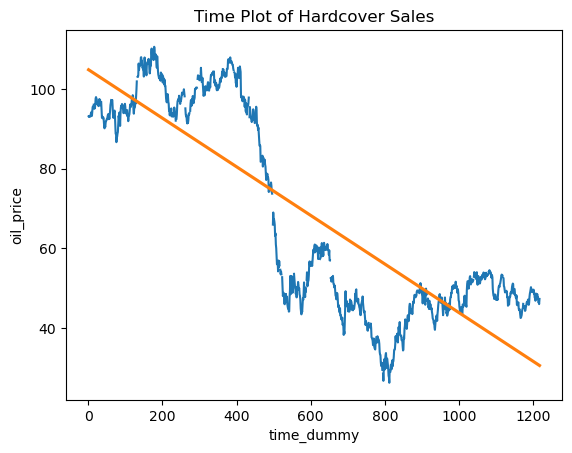

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use("ggplot")

fig,  ax = plt.subplots()
ax.plot('time_dummy','oil_price', data = df)
ax = sns.regplot(x='time_dummy', y= 'oil_price', data = df, ci=None, scatter_kws=dict(color='1'))
ax.set_title('Time Plot of Hardcover Sales');

`Lags features` are variables with their values **shifted in time**.

In [25]:
df['oil_price_l1'] = df['oil_price'].shift(1)
df.head(10)

,oil_price,time_dummy,oil_price_l1
date,,,
2013-01-01,NaN,0,NaN
2013-01-02,93.14,1,NaN
2013-01-03,92.97,2,93.14
2013-01-04,93.12,3,92.97
2013-01-07,93.20,4,93.12
2013-01-08,93.21,5,93.20
2013-01-09,93.08,6,93.21
2013-01-10,93.81,7,93.08
2013-01-11,93.60,8,93.81


With lag variables We can build **lag plots*.

With lag plots, que can evaluate if a lag variable woulb be useful, depending the correlation sketched in the plot.

Lag features let you model `serial dependence`. A time series has serial dependence when an observation can be predicted from previous observations.

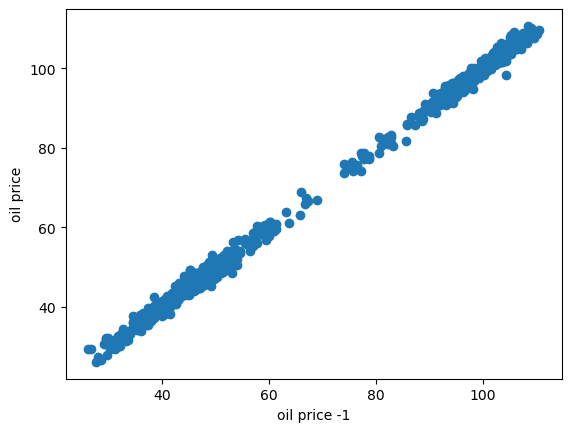

In [26]:
# lag plot
plt.scatter('oil_price_l1', 'oil_price', data=df)
plt.xlabel('oil price -1')
plt.ylabel('oil price')
ax.set_aspect(1)

## Time series and Machine learnig

Adapting Machine Learning algorithms to time series is **largerly about feature engineering with the time index and lags**. 

In [27]:
#number of vehicles traveling through the Baregg Tunnel in Switzerland 
# each day from November 2003 to November 2005
tunnel_data = pd.read_csv(os.path.join(ts_path, 'tunnel.csv'), parse_dates=['Day']) # parse Day col to Datetime64
tunnel_data.head()

,Day,NumVehicles
0,2003-11-01,103536
1,2003-11-02,92051
2,2003-11-03,100795
3,2003-11-04,102352
4,2003-11-05,106569


In [8]:
tunnel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day          747 non-null    datetime64[ns]
 1   NumVehicles  747 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.8 KB


In [9]:
print(tunnel_data['Day'].min(), tunnel_data['Day'].max())

2003-11-01 00:00:00 2005-11-16 00:00:00


In [10]:
# preprocessing
# set index
tunnel_data = tunnel_data.set_index('Day')
tunnel_data

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569
...,...
2005-11-12,104646
2005-11-13,94424
2005-11-14,112165


In [11]:
# By default, Pandas creates a `DatetimeIndex` with dtype `Timestamp`
# (equivalent to `np.datetime64`, representing a time series as a
# sequence of measurements taken at single moments. A `PeriodIndex`,
# on the other hand, represents a time series as a sequence of
# quantities accumulated over periods of time. Periods are often
# easier to work with, so that's what we'll use in this course.
tunnel_data = tunnel_data.to_period()

tunnel_data.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [12]:
tunnel_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 747 entries, 2003-11-01 to 2005-11-16
Freq: D
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   NumVehicles  747 non-null    int64
dtypes: int64(1)
memory usage: 11.7 KB


In [13]:
# create a dummy time variable
df = tunnel_data.copy()
df['Time'] = np.arange(len(df['NumVehicles']))

In [14]:
df

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4
...,...,...
2005-11-12,104646,742
2005-11-13,94424,743
2005-11-14,112165,744


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
X = df.loc[:, ['Time']]
y = df.loc[:, ['NumVehicles']]

In [17]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [18]:
y_predict = pd.Series(model.predict(X).flatten(), index=X.index)

In [72]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
#%config InlineBackend.figure_format = 'retina'

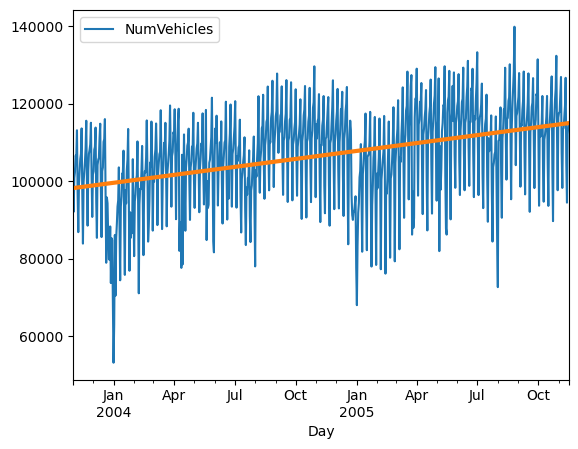

In [20]:
ax = y.plot()
ax = y_predict.plot(ax=ax, linewidth=3)